# Traffic Signs Image Classification - Analysis and pre-processing


In [1]:
import helpers
import cv2
import pandas as pd



In [2]:
folder = '/home/alexandre/Documents/Data/TrafficSigns'
train_dataframe = pd.read_csv('/home/alexandre/Documents/Data/TrafficSigns/Train.csv')



In [3]:
train_dataframe = train_dataframe.sort_values(by=['ClassId'])
train_dataframe.head(5)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,29,30,5,6,24,25,0,Train/0/00000_00000_00000.png
134,70,74,7,7,64,68,0,Train/0/00000_00004_00014.png
135,72,75,7,6,65,68,0,Train/0/00000_00004_00015.png
136,74,79,7,7,68,72,0,Train/0/00000_00004_00016.png
137,74,80,6,8,67,73,0,Train/0/00000_00004_00017.png


Print the number of images per class, and the range of their sizes.


In [4]:
train_class_count = train_dataframe['ClassId'].value_counts().sort_index()
print(f"\nNumber of images per class in the 2019 dataset:\n{train_class_count}")

print(f"\nWidth range - min: {train_dataframe['Width'].min()}, max: {train_dataframe['Width'].max()}")
print(f"\nHeight range - min: {train_dataframe['Height'].min()}, max: {train_dataframe['Height'].max()}")




Number of images per class in the 2019 dataset:
0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: ClassId, dtype: int64

Width range - min: 25, max: 243

Height range - min: 25, max: 225


Visualize the proportions of each class on the dataset.


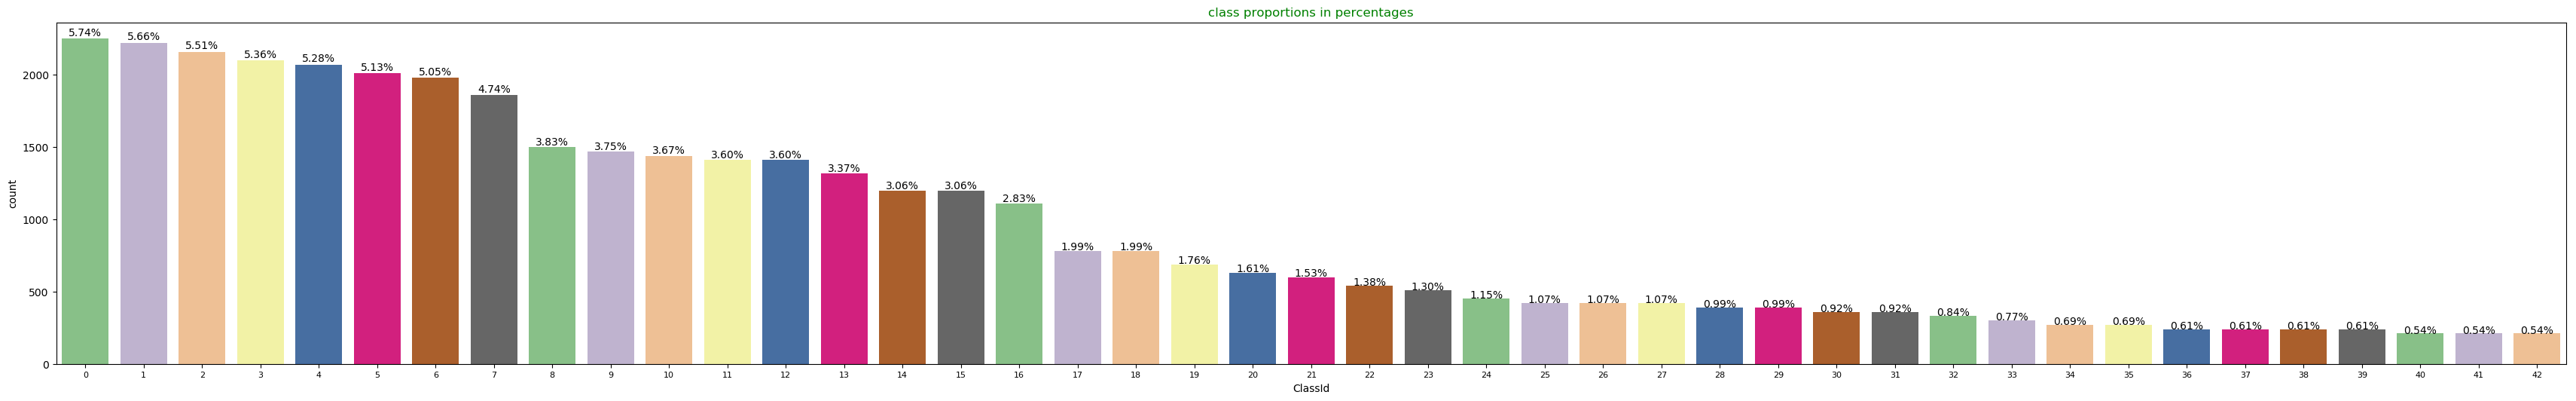

In [5]:
helpers.visualize_percentages(class_names=list(train_class_count.index), labels=train_dataframe, 
                              feature='ClassId', save_file='percentages.png')



Visualize some examples from each class.


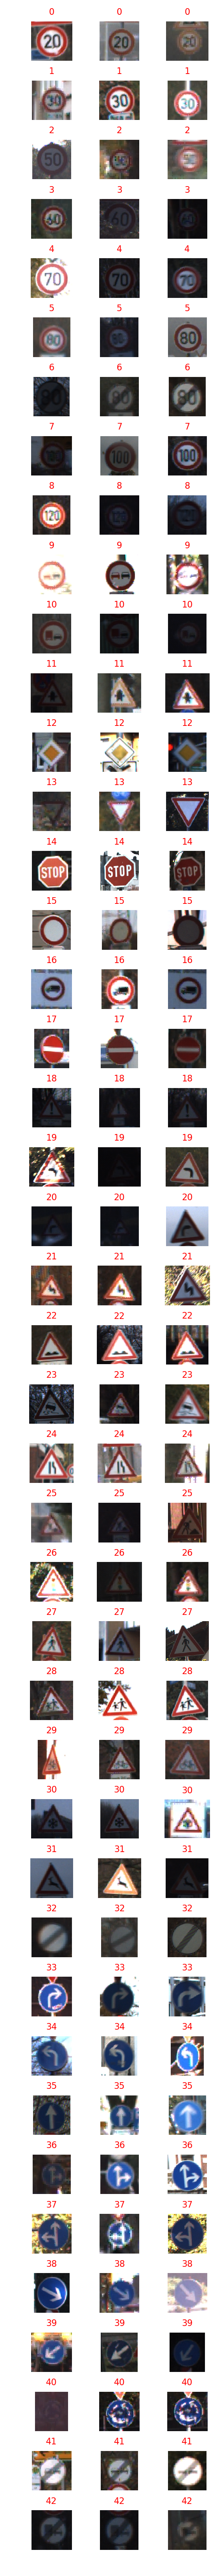

In [6]:
helpers.visualize_images(path=folder, class_list=list(train_class_count.index),
                         labels=train_dataframe, path_feature_name='Path', 
                         id_feature_name='ClassId', save_file='classes.png')



Apply the stochastic pre-processing function to one of the images and visualize some variations.


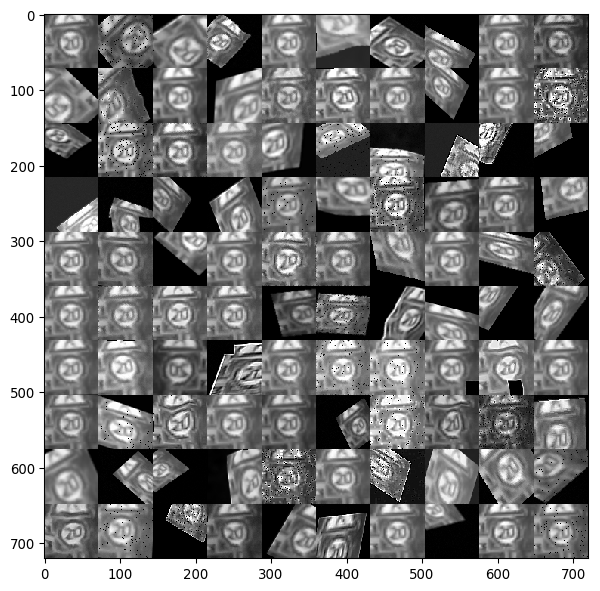

In [7]:
image_size = 72
image_path = f'{folder}/Train/0/00000_00000_00000.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (image_size, image_size))
        
        
augmenter = helpers.get_augmenter()
augmenter.show_grid([image], cols=10, rows=10)

